In [14]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from mcmc import *

In [26]:
with open("./data/corpus_wikipedia_2020-03-01_all_lines.txt") as f:
    lines = f.readlines()


In [27]:
full_text = " ".join(lines).lower().replace('!', '.')


In [28]:
len(full_text)


1477874744

In [29]:
known_chars = "aąbcćdeęfghijklłmnńoóprsśtuvwxyzżź0123456789 ,."


In [30]:
full_text = remove_unknown_symbols(known_chars, full_text)

In [31]:
text_to_decode = (
    "na fundamentach starego urzędu gminy, rozpoczęto budowę nowego obiektu, mającego w przyszłości spełniać rolę gminnego ośrodka kultury gok."
    " uroczyście otwarty w dniu 23 maja 1989 r. gminny ośrodek kultury, zwany z racji widniejącego na frontonie rzeźby mitycznego pegaza,"
    " pod pegazem, okazał się wyśmienitym obiektem do pełnienia roli do jakiej został powołany."
).lower()

In [32]:
text_lengths = [10**i for i in range(4,8)] +[-1]

In [33]:
text_lengths

[10000, 100000, 1000000, 10000000, -1]

In [34]:
hamming_losses_arrays = []
final_texts = []
iters = int(1e+5)
for text_length in text_lengths[-1:]:
    count_dict = create_count_dict(full_text[:text_length], known_chars)
    perc_dict = create_perc_dict(count_dict, known_chars)

    crypt_keys = create_rand_crypt(known_chars)
    crypt_dict = str_to_key(known_chars, crypt_keys)
    crypt_text = apply_dict(text_to_decode, crypt_dict)
    

    num_repeats = 5
    _final_texts = []
    hamming_losses_array = []
    for _ in range(num_repeats):
        current_dict, best_score, best_text, hamming_losses, scores = decrypt_MCMC(crypt_text, perc_dict, crypt_keys, known_chars, iters,verbose = False, real_text=text_to_decode)
        hamming_losses_array.append(hamming_losses)
        _final_texts.append(best_text[-1])
    hamming_losses_array = np.array(hamming_losses_array)
    final_texts.append(_final_texts)
    hamming_losses_arrays.append(hamming_losses_array)
    

In [12]:
for hamming_losses_array in hamming_losses_arrays:
    print(np.mean(hamming_losses_array[:,-1]))

0.34444444444444444


In [20]:
len(scores)

6261

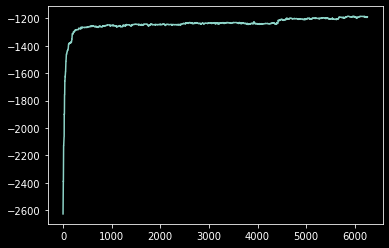

In [21]:
plt.plot(scores)
plt.show()

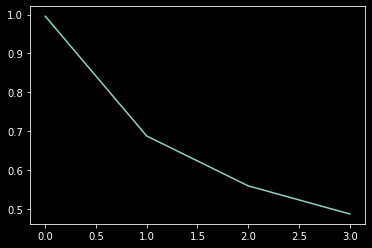

In [63]:
plt.plot([np.mean(hamming_losses_array[:,-1]) for hamming_losses_array in hamming_losses_arrays])

In [62]:
import matplotlib.pyplot as plt

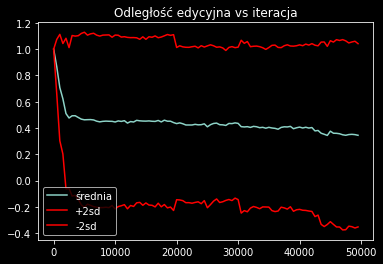

In [22]:
xticks = [500*i for i in range(len(hamming_losses))]
plt.plot(xticks, np.mean(hamming_losses_array, axis=0))
plt.plot(xticks, np.mean(hamming_losses_array, axis=0)+2*np.sqrt(np.var(hamming_losses_array,axis=0)), c='red')
plt.plot(xticks, np.mean(hamming_losses_array, axis=0)-2*np.sqrt(np.var(hamming_losses_array,axis=0)), c='red')
plt.title('Odległość edycyjna vs iteracja')
plt.legend(("średnia", "+2sd", "-2sd"))
plt.show()

In [ ]:
np.mean(hamming_losses_array[:,-1]<0.1)

In [ ]:
hamming_losses_array[:,-1]

In [24]:
final_texts

[['na fundamentach starego urzędu gminy, rozpoczęto budowę nowego obiektu, mającego w przyszłości spełniaź rolę gminnego ośrodka kultury gok. uroczyście otwarty w dniu 14 maja 3020 r. gminny ośrodek kultury, zwany z racji widniejącego na frontonie rzeżby mitycznego pegaza, pod pegazem, okazał się wyśmienitym obiektem do pełnienia roli do jakiej został powołany.',
  'na xundamentach ftapego uprędu gminy, porzocręto budowę nowego obiektu, mającego w zpryfrłosci fzełniań polę gminnego ospodka kultupy gok. upocryscie otwapty w dniu 94 maja 1828 p. gminny ospodek kultupy, rwany r pacji widniejącego na xpontonie preźby mitycrnego zegara, zod zegarem, okarał fię wysmienitym obiektem do zełnienia poli do jakiej roftał zowołany.',
  'na fundamentach starego urzędu gminy, rozpoczęto budowę nowego obiektu, mającego w przyszłości spełniać rolę gminnego ośrodka kultury gok. uroczyście otwarty w dniu 36 maja 2191 r. gminny ośrodek kultury, zwany z racji widniejącego na frontonie rzeźby mitycznego pe